# SPARKS FOUNDATION 

# DATA SCIENCE AND BUSINESS ANALYTICS TASK2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

SCATTER PLOT


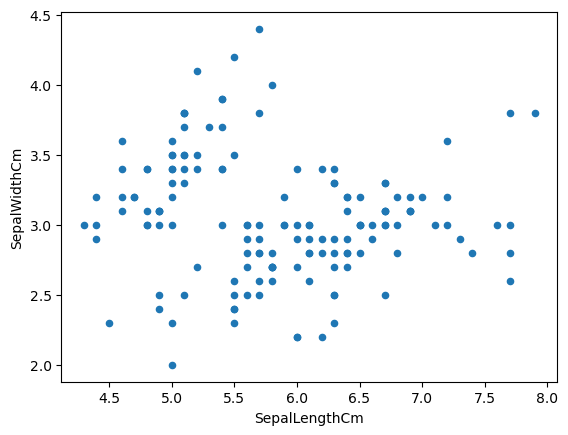

In [6]:
df.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm')
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
x=df.iloc[:,[0,1,2]].values
x

array([[  1. ,   5.1,   3.5],
       [  2. ,   4.9,   3. ],
       [  3. ,   4.7,   3.2],
       [  4. ,   4.6,   3.1],
       [  5. ,   5. ,   3.6],
       [  6. ,   5.4,   3.9],
       [  7. ,   4.6,   3.4],
       [  8. ,   5. ,   3.4],
       [  9. ,   4.4,   2.9],
       [ 10. ,   4.9,   3.1],
       [ 11. ,   5.4,   3.7],
       [ 12. ,   4.8,   3.4],
       [ 13. ,   4.8,   3. ],
       [ 14. ,   4.3,   3. ],
       [ 15. ,   5.8,   4. ],
       [ 16. ,   5.7,   4.4],
       [ 17. ,   5.4,   3.9],
       [ 18. ,   5.1,   3.5],
       [ 19. ,   5.7,   3.8],
       [ 20. ,   5.1,   3.8],
       [ 21. ,   5.4,   3.4],
       [ 22. ,   5.1,   3.7],
       [ 23. ,   4.6,   3.6],
       [ 24. ,   5.1,   3.3],
       [ 25. ,   4.8,   3.4],
       [ 26. ,   5. ,   3. ],
       [ 27. ,   5. ,   3.4],
       [ 28. ,   5.2,   3.5],
       [ 29. ,   5.2,   3.4],
       [ 30. ,   4.7,   3.2],
       [ 31. ,   4.8,   3.1],
       [ 32. ,   5.4,   3.4],
       [ 33. ,   5.2,   4.1],
       [ 3

ELBOW METHOD

C:\Users\Rohith10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rohith10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rohith10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rohith10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

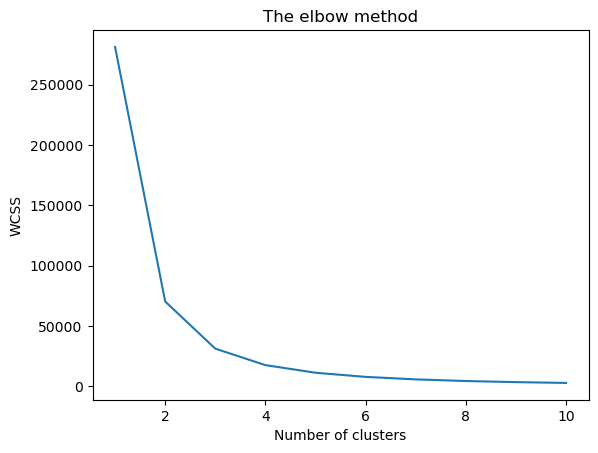

In [19]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                  max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=100,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

C:\Users\Rohith10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


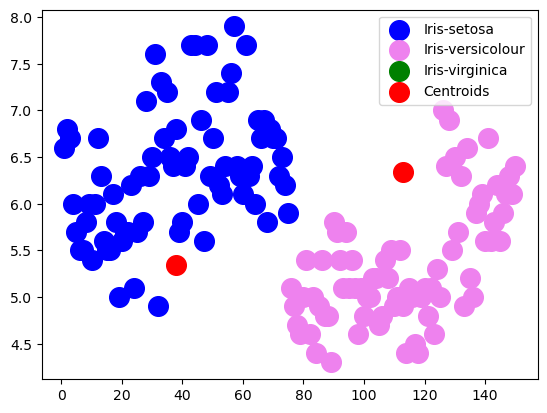

In [29]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==1,1],s=200,c='blue',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==0,1],s=200,c='violet',label='Iris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=200,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.legend()
